# **1. Import Library**

In [48]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [49]:
# Memuat Dataset dari Hasil Clustering
df = pd.read_csv('clustering_result.csv')

In [50]:
print(df.head())

   Customer_Age Gender  Dependent_count  Education_Level  Marital_Status  \
0     -0.165406      M                3                3               1   
1      0.333570      F                5                2               2   
2      0.583058      M                3                2               1   
3     -0.789126      F                4                3               3   
4     -0.789126      M                3                5               1   

  Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  \
0     $60K - $80K              0              39                         5   
1  Less than $40K              0              44                         6   
2    $80K - $120K              0              36                         4   
3  Less than $40K              0              34                         3   
4     $60K - $80K              0              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0       

In [51]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('Cluster', axis=1)
y = df['Cluster']

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [52]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y        # Stratify (untuk data imbalance)
)

print("Distribusi Kelas:")
print(y.value_counts(normalize=True))

Distribusi Kelas:
Cluster
0    0.342056
1    0.335242
2    0.322702
Name: proportion, dtype: float64


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [53]:
# Preprocessing dan Model
numerical_cols = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt']
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Card_Category']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        random_state=42
    ))
])

In [54]:
# Training Model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Customer_Age',
                                                   'Credit_Limit',
                                                   'Total_Trans_Amt']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Education_Level',
                                                   'Marital_Status',
                                                   'Card_Category'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, random_state=42))])

#### **1. Preprocessing Data**
- **Data Numerik** (`Customer_Age`, `Credit_Limit`, `Total_Trans_Amt`)

- **Data Kategorikal** (`Gender`, `Education_Level`, dll.):
  - **OneHotEncoder**: Mengonversi kategori string (e.g., 'Male', 'Female') menjadi vektor biner (e.g., [1, 0] untuk 'Male')

#### **2. Random Forest Classifier**
- **Algoritma**: Ensemble learning dengan banyak decision tree (100 pohon)
- **Hyperparameter**:
  - `max_depth=5`: Membatasi kedalaman pohon untuk mencegah overfitting
  - `random_state=42`: Memastikan hasil reproducible

## **b. Evaluasi Model Klasifikasi**

In [55]:
# Evaluasi
y_pred = model.predict(X_test)

print("\nEvaluasi Model:")
print(f"Akurasi: {accuracy_score(y_test, y_pred):.2%}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2%}")


Evaluasi Model:
Akurasi: 94.31%
F1-Score: 94.29%


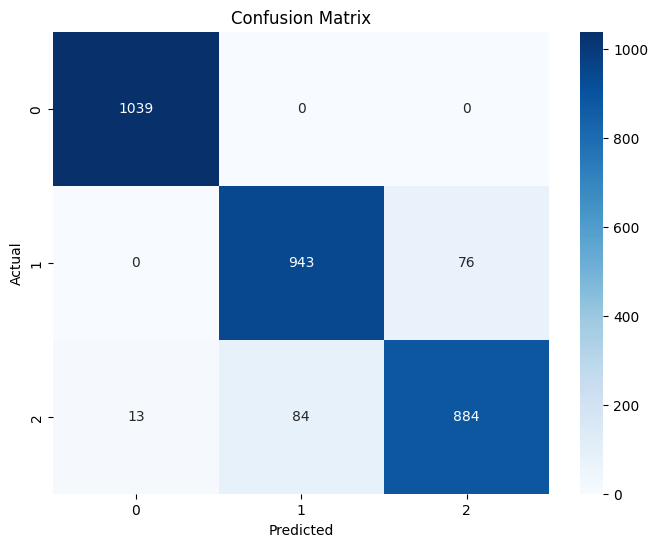

In [56]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Hasil Evaluasi Model**

- **Akurasi Keseluruhan**: 94.31%
- **Performa per Kelas**:
  - **Kelas 0**: Prediksi sempurna (100% akurat)
  - **Kelas 1**:
    - 943 prediksi benar
    - 76 salah diklasifikasi sebagai Kelas 2
  - **Kelas 2**:
    - 884 prediksi benar
    - 13 salah sebagai Kelas 0
    - 84 salah sebagai Kelas 1

#### **Analisis Singkat**
1. **Kelas 0** teridentifikasi sempurna
2. **Kesalahan utama** terjadi antara:
   - Kelas 1 dan 2 (76 kasus)
   - Kelas 2 dengan 0/1 (97 kasus total)
3. Kemungkinan fitur Kelas 1 dan 2 mirip

## **c. Tuning Model Klasifikasi (Optional)**

In [57]:
# Tuning Hyperparameter
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Customer_Age',
                                                                          'Credit_Limit',
                                                                          'Total_Trans_Amt']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'Education_Level',
                                                                          'Marital_Status',
                                                                          'Card_Category'])])),
                                       ('classifier',
                                        RandomForestClassifier(max_depth=5,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [3, 5, 7],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100, 200]})

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

In [58]:
# Evaluasi Setelah Tuning
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

print("\nEvaluasi Setelah Tuning:")
print(f"Akurasi: {accuracy_score(y_test, y_pred_tuned):.2%}")
print(f"F1-Score: {f1_score(y_test, y_pred_tuned, average='weighted'):.2%}")
print(f"Best Parameters: {grid_search.best_params_}")


Evaluasi Setelah Tuning:
Akurasi: 96.12%
F1-Score: 96.11%
Best Parameters: {'classifier__max_depth': 7, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}


### **Hasil Setelah Tuning**

#### **Performa Model**
- **Akurasi**: 96.12% (+1.81% dari sebelumnya)
- **F1-Score**: 96.11% (+1.82% dari sebelumnya)
- **Parameter Terbaik**:
    - max_depth: 7
    - min_samples_split: 5
    - n_estimators: 200

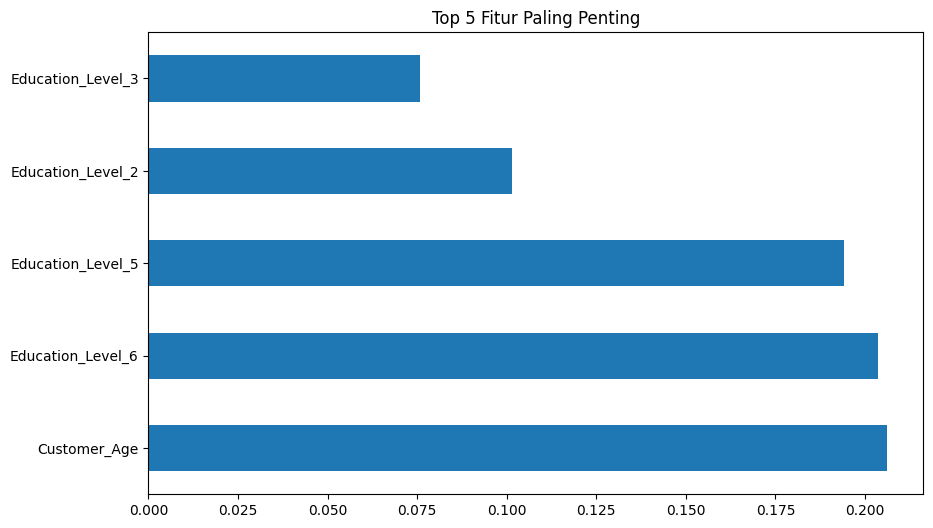

In [59]:
# Feature Importance
feature_importances = best_model.named_steps['classifier'].feature_importances_
feature_names = numerical_cols + list(best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols))

plt.figure(figsize=(10,6))
pd.Series(feature_importances, index=feature_names).nlargest(5).plot(kind='barh')
plt.title('Top 5 Fitur Paling Penting')
plt.show()

### **5 Fitur Paling Penting**
1. **Education_Level_3** (Pengaruh: 0.075)
2. **Education_Level_2** (0.100)  
3. **Education_Level_5** (>0.175)
4. **Education_Level_6** (>0.200)
5. **Customer_Age** (>0.200 paling tinggi)

### **Insight**

- Semakin tinggi level pendidikan (dari level 2 ke 6), pengaruh semakin besar
- `Customer_Age` menyumbang pengaruh tertinggi (>0.20)  
- **Insight**: Perilaku berbeda didasarkan pada kelompok usia

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### **Langkah Evaluasi Model**
1. **Perbandingan Performa**  
   - Sebelum tuning: Akurasi 94.31%  
   - Setelah tuning: **96.12%** (+1.81%)

2. **Rekomendasi**  
   - Sepertinya masih terdapat data imbalance mungkin coba pakai SMOTE